# Mô tả data

Bộ dữ liệu này bao gồm 200 mẫu, và mỗi mẫu gồm 3 đặc trưng gồm số tiền quảng cáo trên TV, trên radio, 
và trên newspaper. Giá trị sale (thực) được cung cấp cho mỗi mẫu. Hình sau hiển thị minh họa một số mẫu 
từ bộ dữ liệu advertising.

ảnh

In [1]:
n = 4 #số lượng cá thể (chromosome), 3 feature ứng với c1, c2, c3 và 1 bias ứng với c4 
m = 200 #số lượng quần thể (population)
n_generations = 2000 #số lượng thế hệ tiến hóa

In [2]:
import random 
import matplotlib.pyplot as plt
import os

losses = [] # dùng để vẽ biểu đồ quá trình tối ưu

def load_data():
    file = open('../data/advertising.csv', 'r')
    lines = file.readlines()
    
    features = []
    prices = []
    
    for i in range(1,201): 
        #Đọc từng dòng và gán vào mảng
        strings = lines[i].split(',') 
        #Lược bỏ khoảng trắng và chuyển về dạng float, bỏ đi "\n", bỏ đi cột cuối là giá trị thực
        feature = [float(s.strip()) for s in strings[:len(strings)-1]] 
        #Thêm giá trị 1.0 vào mỗi mẫu feature để số lượng đặc trưng bằng số lượng tham số
        feature.append(1.0)
        features.append(feature)
        prices.append(float(strings[-1]))
        
    file.close()
    return features, prices

features, prices = load_data()
print(features[0])
print(prices[0])
print(len(features))

[230.1, 37.8, 69.2, 1.0]
22.1
200


In [3]:
def generate_random_value(bound = 100): 
    return (random.random())*bound

print(generate_random_value())

def create_individual():
    return [generate_random_value() for _ in range(n)]


12.978975041477359


Ta tính loss cho một dự đoán bằng cách so sánh giá trị doanh thu(sales) ước lượng (tính dựa theo phương trình 1) với giá trị doanh thu thực tế.
Losses là tổng các loss của tất cả các dự đoán loss


In [4]:
def compute_loss(individual):
    estimated_prices = []
    for feature in features:
        estimated_price = sum(c*x for x, c in zip(feature, individual))
        estimated_prices.append(estimated_price)
    losses= [abs(y_est-y_gt) for y_est, y_gt in zip(estimated_prices, prices)]
    return sum(losses)


In [5]:
def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1/(loss+1)
    return fitness

In [6]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

In [7]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

In [8]:
def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)    
    while True:
        index2 = random.randint(0, m-1)    
        if (index2 != index1):
            break
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

In [9]:
def create_new_population(old_population, elitism=2, gen=1):
    sorted_population = sorted(old_population, key=compute_fitness)
        
    if gen%1 == 0:
        losses.append(compute_loss(sorted_population[m-1]))
        #print("Best loss:", compute_loss(sorted_population[m-1]))
    
    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)            
    
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())
    
    return new_population

population = [create_individual() for _ in range(m)]

In [13]:
for i in range(n_generations):
    population = create_new_population(population, 2, i)
    if(i == n_generations-1):
        print("Lựa chọn tốt nhất: ")
        print(population[m-1])

Lựa chọn tốt nhất: 
[0.036721216534629786, 0.13516364832635297, 0.004749869361553305, 6.2872444576668185]


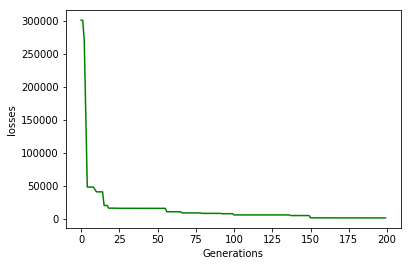

In [14]:
import matplotlib.pyplot as plt

plt.plot(losses[:200], c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()

[0.036721216534629786, 0.13516364832635297, 0.004749869361553305, 6.2872444576668185]
350.13996068289583


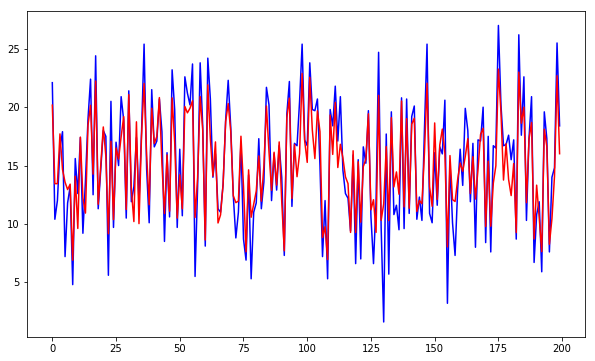

In [15]:
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[m-1])
individual = sorted_population[m-1]

estimated_prices = []
for feature in features:
    estimated_price = sum(c*x for x, c in zip(feature, individual))
    estimated_prices.append(estimated_price)
    
losses = [abs(y_est-y_gt) for y_est, y_gt in zip(estimated_prices, prices)]
print(sum(losses))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(prices, c='blue')
plt.plot(estimated_prices, c='red')
plt.show()